# Olympics Data Analysis

***

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Filtering the data for only Summer season

In [4]:
df = df[df['Season']=='Summer']
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


## Add region in this data by performing join on the region dataset

In [5]:
region_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [6]:
df = df.merge(region_df,on='NOC',how='left')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


## Total Countries Participated in Olympics

In [7]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

### Null Values

In [8]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

### Checking duplicate values and removing them

In [9]:
print(df.duplicated().sum())

1385


In [10]:
df.drop_duplicates(inplace = True)

In [11]:
print(df.duplicated().sum())

0


---

## Medal Tally

#### Making separate column for all medals

In [12]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [13]:
dummies = pd.get_dummies(df['Medal']).astype(int)
dummies

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [14]:
df = pd.concat([df,dummies],axis=1)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [15]:
df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,region,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,Russia,1220,974,994
2,Germany,1075,987,1064
3,UK,635,729,620
4,Italy,518,474,454
...,...,...,...,...
200,Vanuatu,0,0,0
201,"Virgin Islands, British",0,0,0
202,"Virgin Islands, US",0,1,0
203,Yemen,0,0,0


**The above calculation is wrong as the data contains medal record value for each player in the team**

In [16]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [17]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [18]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [19]:
medal_tally

,region,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Vanuatu,0,0,0,0
201,"Virgin Islands, British",0,0,0,0
202,"Virgin Islands, US",0,1,0,1
203,Yemen,0,0,0,0


## Creating Filters(Dropdown) Year and Country

**Year**

In [20]:
years = df['Year'].unique().tolist()

In [21]:
years.sort()

In [22]:
years.insert(0,"Overall")

In [23]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

**Country**

In [24]:
country = np.unique(df['region'].dropna()).tolist()

In [25]:
country.sort()

In [26]:
country.insert(0,'Overall')

In [27]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

**Filter Function**

In [28]:
medal_df= df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [29]:
def fetch_medal_tally(df,years,country):
    medal_df= df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag = 0
    if years == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if years == 'Overall' and country != 'Overall':
        flag =1
        temp_df = medal_df[medal_df['region'] == country]
    if years != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(years)]
    if years != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == 2016) & (medal_df['region'] == 'India')] 

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']
    print(x)

In [30]:
fetch_medal_tally(df,years="Overall",country="India")

    Year  Gold  Silver  Bronze  Total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


---

# Overall Analysis
- no of editions
- no of cities
- no of sports/events
- no of athletes
- participating nation
 

In [31]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [32]:
# no of editions
editions = df['Year'].unique().shape[0] - 1  #1906 not considered
editions

28

In [33]:
# no of hosts
cities =df['City'].unique().shape[0]
cities

23

In [34]:
# no of sports
sports =df['Sport'].unique().shape[0]
sports

52

In [35]:
# no of events
events =df['Event'].unique().shape[0]
events

651

In [36]:
# no of athletes
athletes =df['Name'].unique().shape[0]
athletes

116122

In [37]:
# participating nation
nations = df['region'].unique().shape[0]
nations

206

## Graphs

In [38]:
# participating nation over the years
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [39]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')
nations_over_time.head()

,Year,count
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22


In [40]:
nations_over_time.rename(columns = {'Year':'Editions','count':'No. of Nations'},inplace=True)

In [41]:
import plotly.express as px
import plotly.io as pio

# Graph not visible (Chrome js error)
pio.renderers.default = 'iframe' 

In [42]:
fig = px.line(nations_over_time, x = 'Editions', y = 'No. of Nations')
fig.show()

In [43]:
# Events over the years
events_over_time = df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('Year')
events_over_time.head()

,Year,count
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109


In [44]:
events_over_time.rename(columns = {'Year':'Editions','count':'Events'},inplace=True)

In [45]:
fig = px.line(events_over_time, x = 'Editions', y = 'Events')
fig.show()

In [46]:
# Heat map - it shows that over the years the events occurred in each sports
x = df.drop_duplicates(['Year','Sport','Event'])

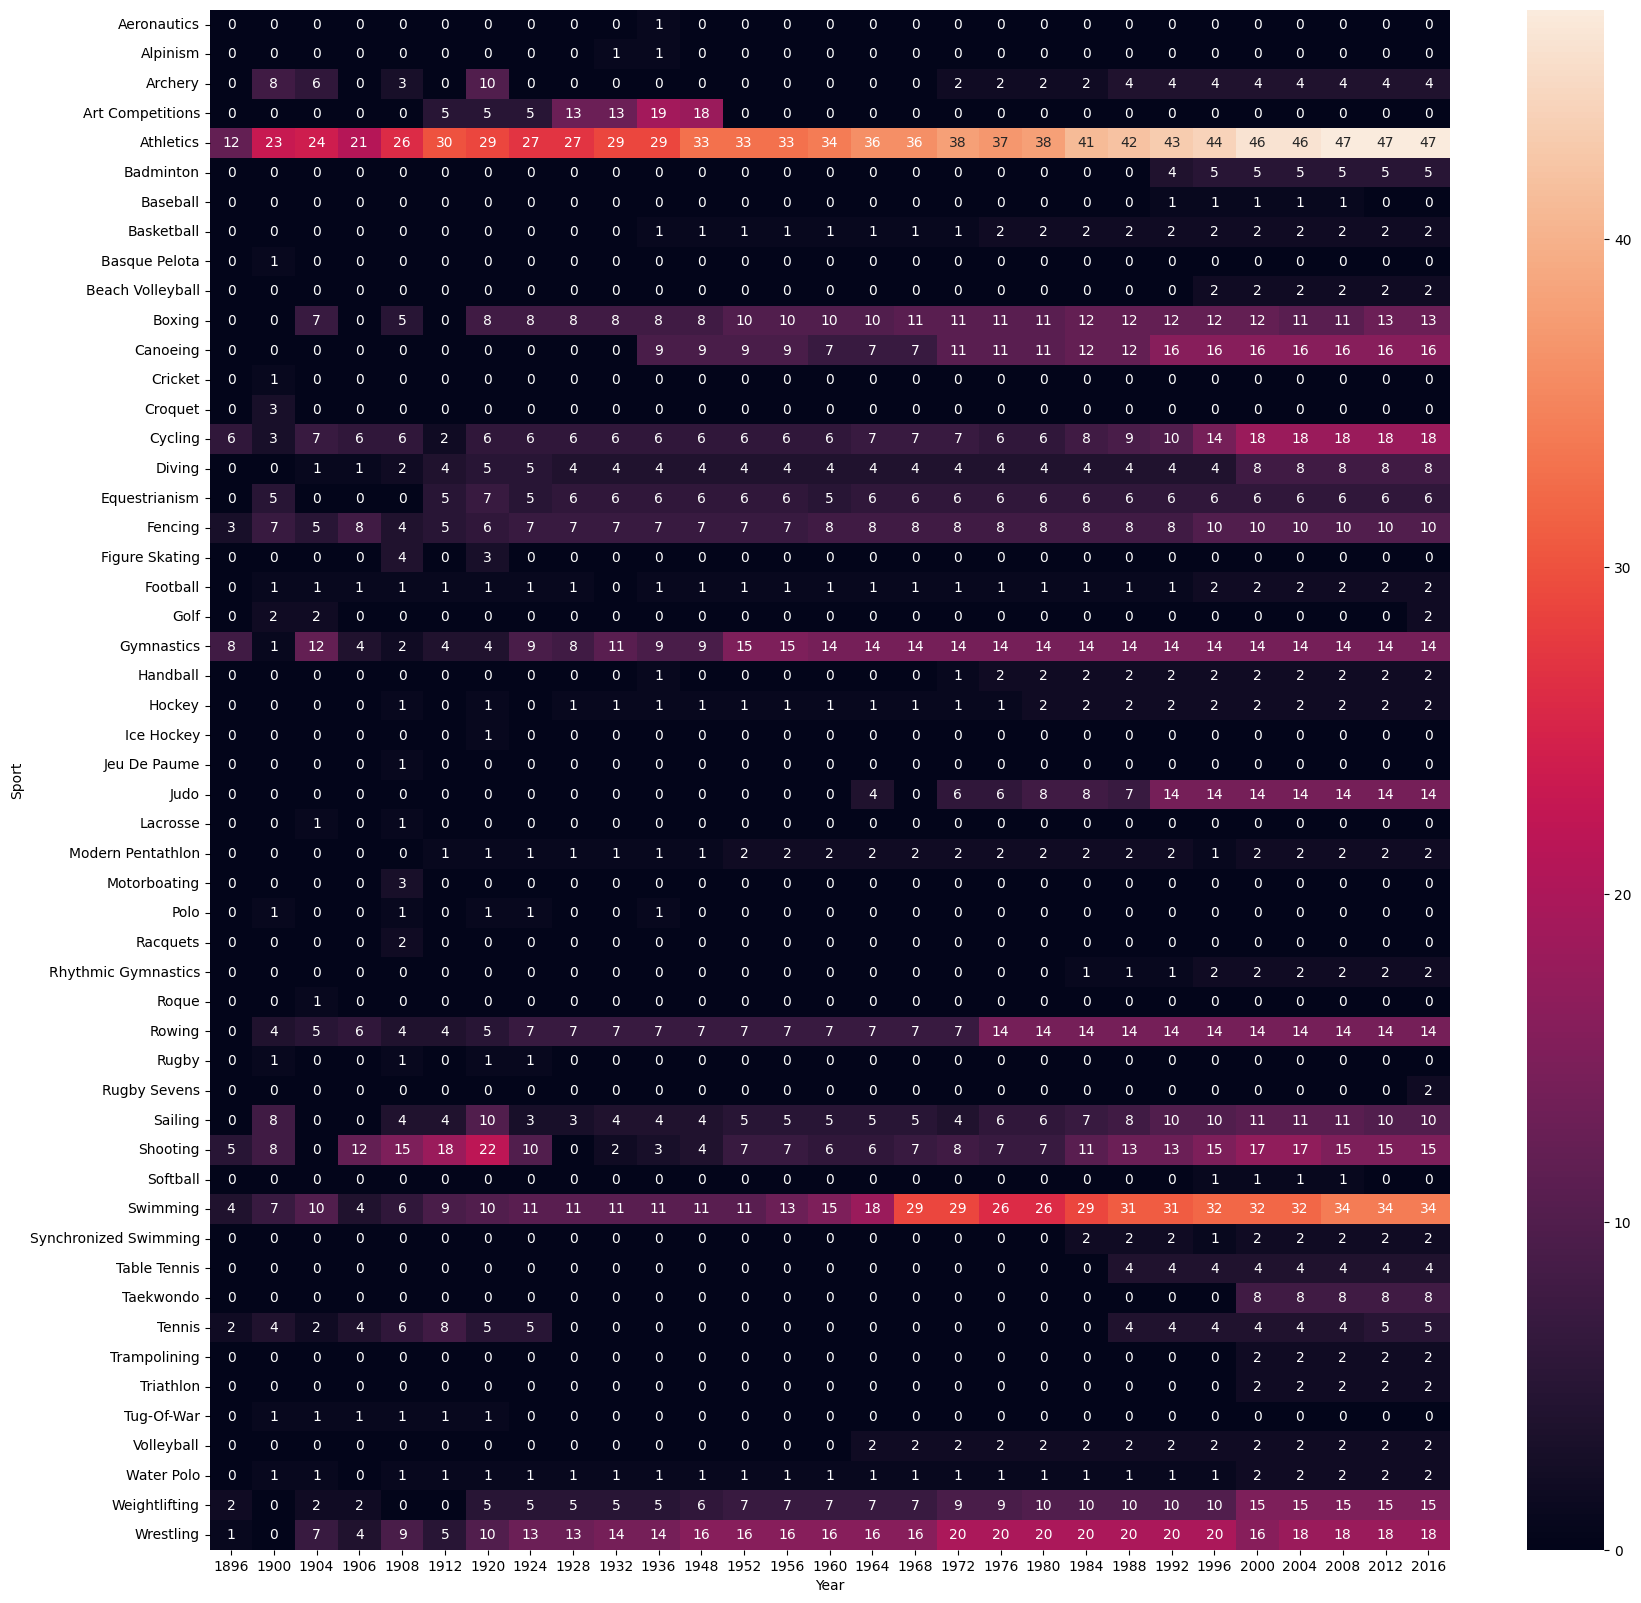

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport', columns='Year' , values = 'Event', aggfunc = 'count').fillna(0).astype(int),annot=True)
plt.show()

## Most Successful Athlete in the respective sport

In [48]:
def most_successful(df,sport):
    temp_df = df.dropna(subset = ['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df, on = 'Name' , how = 'left')[['Name','count','Sport','region']].drop_duplicates('Name')
    x.rename(columns = {'count':'Medals'},inplace = True)
    return x

In [49]:
most_successful(df,'Wrestling')

,Name,Medals,Sport,region
0,Wilfried Dietrich,5,Wrestling,Germany
8,Artur Borisovich Taymazov,4,Wrestling,Uzbekistan
12,Saori Yoshida,4,Wrestling,Japan
16,Bruce Robert Baumgartner,4,Wrestling,USA
20,Eino Aukusti Leino,4,Wrestling,Finland
24,Imre Polyk,4,Wrestling,Hungary
28,Johan Rudolf Svensson,4,Wrestling,Sweden
32,Kaori Icho,4,Wrestling,Japan
36,Aleksandr Aleksandrovich Karelin,4,Wrestling,Russia
40,Sren Marinus Jensen,4,Wrestling,Denmark


---

## Country-Wise Analysis
- Countrywise medal tally analysis per year(line plot)
- What countries are good at heatmap
- Most Successfull athelete Top 10

### Countrywise medal tally analysis per year(line plot)

In [50]:
# Countrywise medal tally analysis per year(line plot)
temp_df = df.drop_duplicates(subset = 'Medal')
temp_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal']) 

In [51]:
new_df = temp_df[temp_df['region'] == 'USA']
final_df =new_df.groupby('Year')['Medal'].count().reset_index()

In [52]:
fig = px.line(final_df, x = 'Year', y = 'Medal')
fig.show()

### Heat map that shows the country which is best in the respective sport

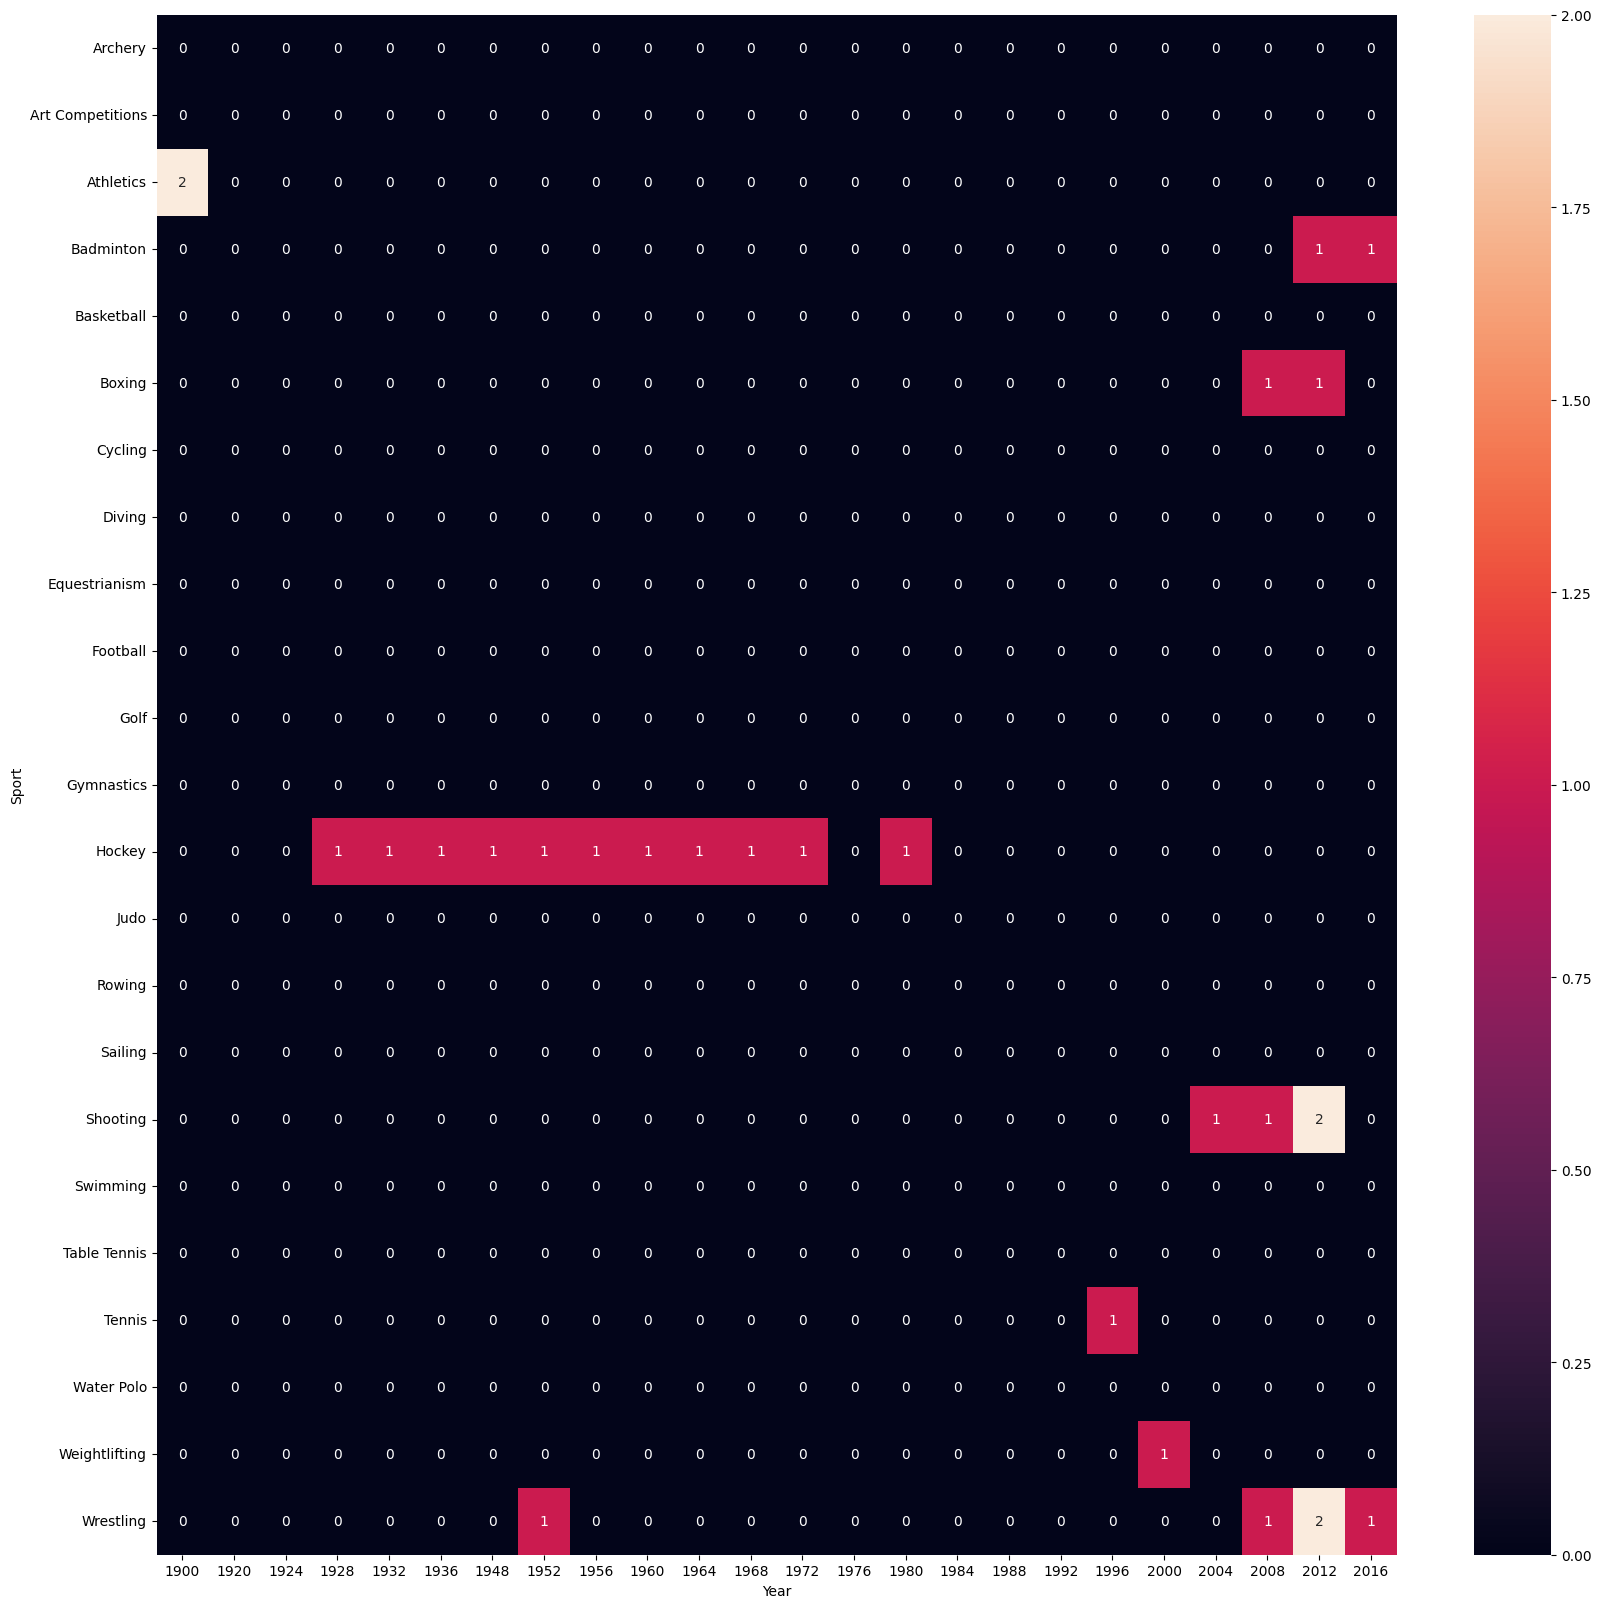

In [53]:
new_df = temp_df[temp_df['region'] == 'India']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport', columns='Year' , values = 'Medal', aggfunc = 'count').fillna(0),annot=True)
plt.show()

### Top 10 athletes 

In [54]:
def most_successful(df,country):
    temp_df = df.dropna(subset = ['Medal'])
    temp_df = temp_df[temp_df['region'] == country]
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df, on = 'Name' , how = 'left')[['Name','count','Sport']].drop_duplicates('Name')
    x.rename(columns = {'count':'Medals'},inplace = True)
    return x

In [55]:
most_successful(df,'India')

,Name,Medals,Sport
0,Leslie Walter Claudius,4,Hockey
4,Udham Singh Kular,4,Hockey
8,"Victor John ""V. J."" Peter",3,Hockey
11,Dhyan Chand Bais,3,Hockey
14,Richard James Allen,3,Hockey
17,Shankar Pillay Laxman,3,Hockey
20,Balbir Singh,3,Hockey
23,Harbinder Singh Chimni,3,Hockey
26,Prithipal Singh,3,Hockey
29,Ranganathan Francis,3,Hockey


---

## Athletes-Wise Analysis

In [56]:
import plotly.figure_factory as ff

In [57]:
# Line CHart that show in which age the probability of winning gold,silver,bronze is high
athlete_df = df.drop_duplicates(subset =['Name','region'])

In [58]:
x1= athlete_df['Age'].dropna() # It shows the age distribution of all the athletes
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [59]:
fig = ff.create_distplot([x1,x2,x3,x3], ['Overall Athlete','Gold Medalist','Silver Medalist','Bronze Medalist'], show_hist = False, show_rug = False)
fig.show()

In [60]:
# Line Chart that shows the probability of winning gold medal for a particular sport in the particular age
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [61]:
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 
       'Beach Volleyball', 'Triathlon', 'Rugby','Polo','Ice Hockey']

In [62]:
x = []
name = []
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)

In [67]:
fig = ff.create_distplot(x, name , show_hist = False , show_rug = False)
fig.show()

In [64]:
# Scatter Plot that shows Particular sport height vs weight comparison

In [82]:
athlete_df['Medal'].fillna('No Medal',inplace = True)

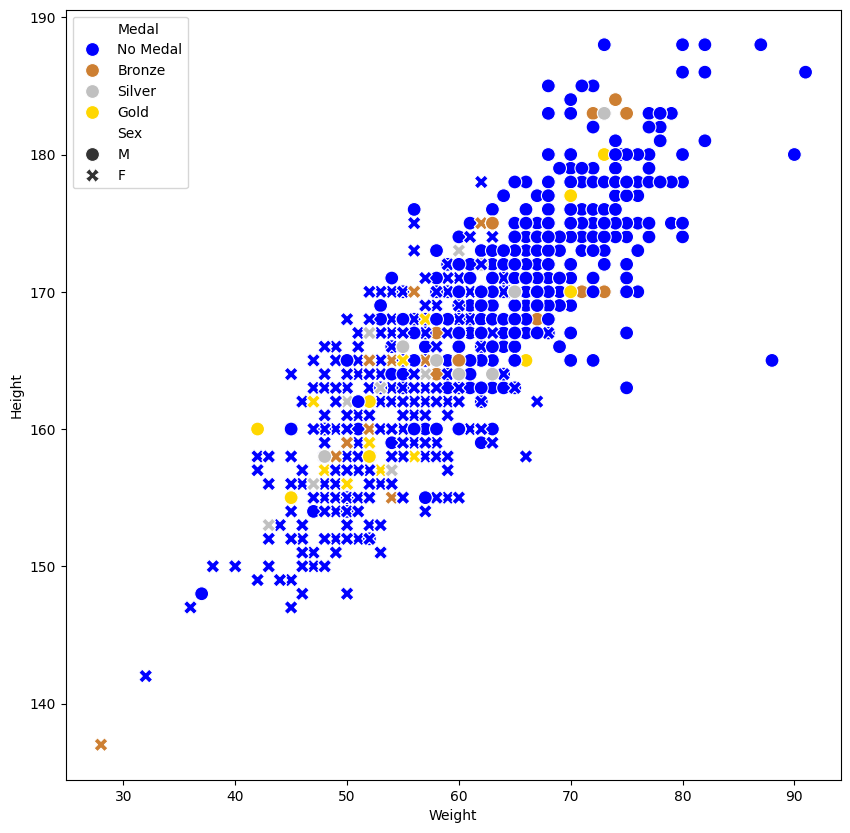

In [83]:
plt.figure(figsize=(10,10))
medal_palette = {
    'Gold': 'gold',
    'Silver': 'silver',
    'Bronze': '#cd7f32',  
    'No Medal': 'blue'
}
temp_df = athlete_df[athlete_df['Sport'] == 'Diving']
sns.scatterplot(x =temp_df['Weight'],y =temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],s=100, palette=medal_palette)
plt.show()

In [85]:
# Line chart that shows Male Vs Female Participation Over the Years

In [87]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [90]:
# Every Year Men Participations
men.head()

,Year,Name
0,1896,174
1,1900,1181
2,1904,629
3,1906,759
4,1908,1772


In [91]:
# Every Year Women Participations
women.head()

,Year,Name
0,1900,23
1,1904,6
2,1906,6
3,1908,44
4,1912,53


In [100]:
final = men.merge(women,on='Year',how='left').fillna(0).astype(int)
final.rename(columns ={'Name_x':'Male','Name_y':'Female'}, inplace = True)

In [101]:
final.head()

,Year,Male,Female
0,1896,174,0
1,1900,1181,23
2,1904,629,6
3,1906,759,6
4,1908,1772,44


In [103]:
fig = px.line(final, x = 'Year', y = ['Male','Female'])
fig